In [1]:
from atom import ATOMClassifier
from sklearn.decomposition import PCA
import sys
import os
from pathlib import Path
import pandas as pd
import joblib
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'src')))
import func_classes


In [2]:
# Get the working directory
input_path = Path.cwd()
root = input_path.parent
data_path = root / "data" / "dev_set_final.csv"
train_df = pd.read_csv(data_path, header=0)
train_df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,-0.102865,0.685403,-0.126342,-0.093143,-0.247408,-0.520330,-0.111809,-0.110824,-0.601156,...,-0.033643,0.947093,-0.109331,-0.009327,0.347352,-0.325847,0.025891,-0.029405,0.004476,0.022014
1,1,0.746094,-0.576609,0.735505,0.774476,-0.025271,0.703912,0.599209,0.768669,-0.031792,...,0.722444,-0.377326,0.685936,0.767430,0.397196,1.322918,1.068668,1.111849,0.287952,0.550844
2,1,1.256510,-1.506800,1.343951,1.402888,1.171520,2.867781,2.342558,2.323853,1.809249,...,1.894644,-0.918023,2.172439,2.537705,0.860748,2.538150,1.880300,1.844805,2.648266,1.934709
3,1,3.660156,0.875068,3.466356,5.180011,0.712979,1.540197,2.216439,3.149202,0.020231,...,3.265162,0.886628,3.064834,4.770601,0.512461,1.075185,1.212758,1.881834,0.044759,0.029518
4,1,-0.087240,0.660018,0.000358,-0.102518,0.682410,1.363083,1.075550,0.732167,0.953757,...,0.092076,0.572674,0.217552,0.088420,1.462617,1.805552,1.566229,0.516903,0.866841,2.204878


In [3]:
utils = func_classes.Utils()
rncv = func_classes.RNcvAtom(
    X=train_df.drop(columns=["diagnosis"]),
    y=train_df["diagnosis"],
    models = ["LGB", "LDA", "LR", "GNB", "RF"],
)
rncv.run()
results = rncv.get_results()



Processing fold: 0
<< ================== ATOM ================== >>

Configuration ==================== >>
Algorithm task: Binary classification.

Dataset stats ==================== >>
Shape: (329, 11)
Train set size: 264
Test set size: 65
-------------------------------------
Memory: 29.08 kB
Scaled: False
Outlier values: 35 (1.2%)


Training ========================= >>
Models: LGB
Metric: fbeta_score


Running hyperparameter tuning for LightGBM...
| trial | n_estimators | learning_rate | max_depth | num_leaves | min_child_weight | min_child_samples | subsample | colsample_bytree | reg_alpha | reg_lambda | fbeta_score | best_fbeta_score | time_trial | time_ht |    state |
| ----- | ------------ | ------------- | --------- | ---------- | ---------------- | ----------------- | --------- | ---------------- | --------- | ---------- | ----------- | ---------------- | ---------- | ------- | -------- |
| 0     |          200 |        0.7969 |        13 |         32 |           0.0009 |     

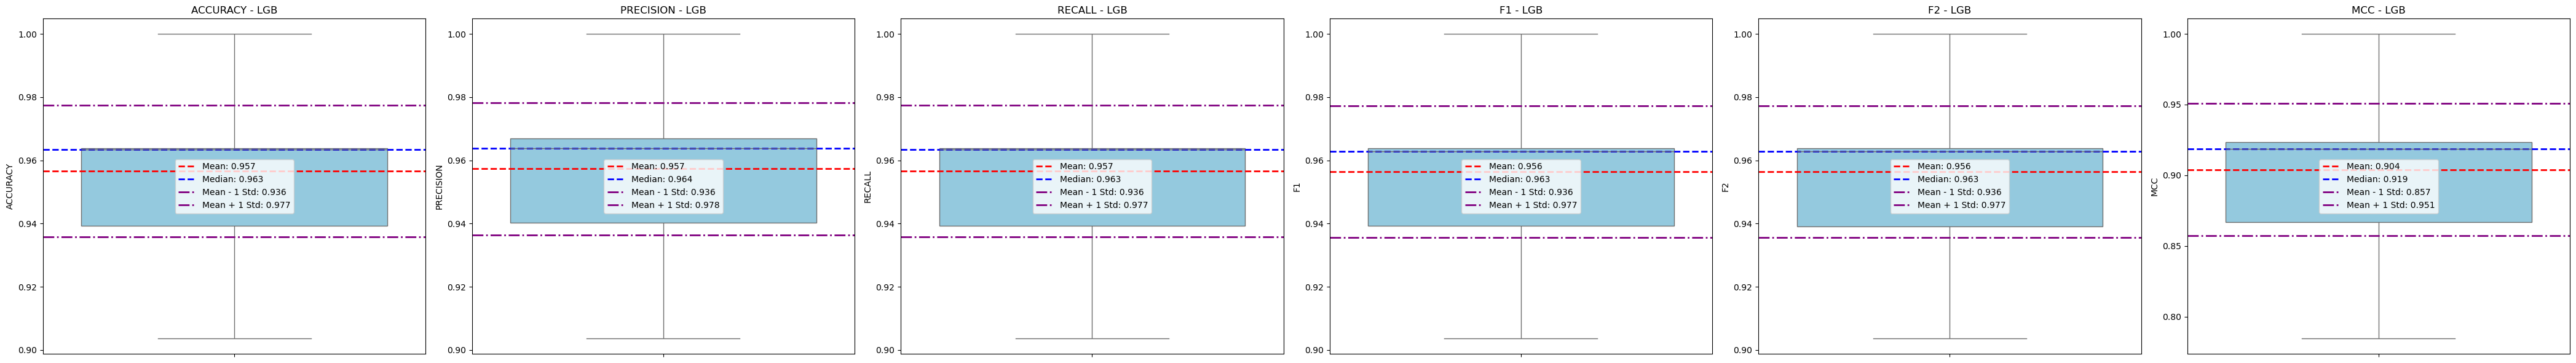

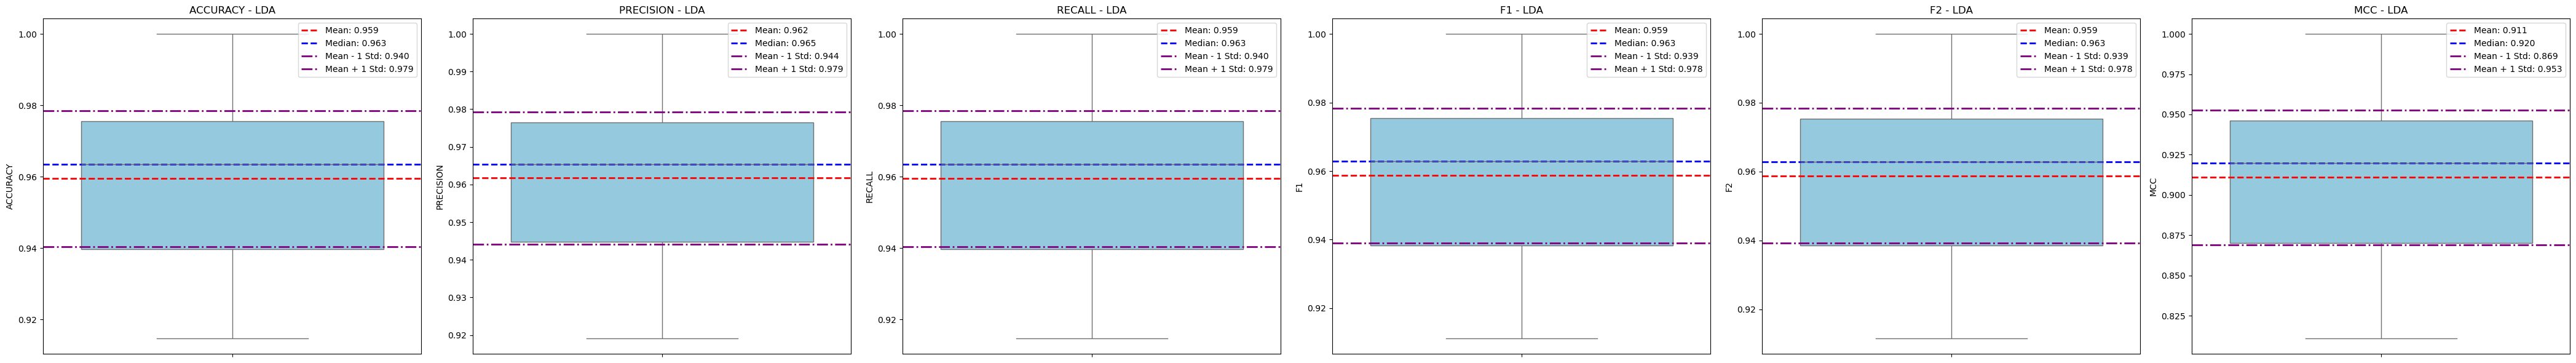

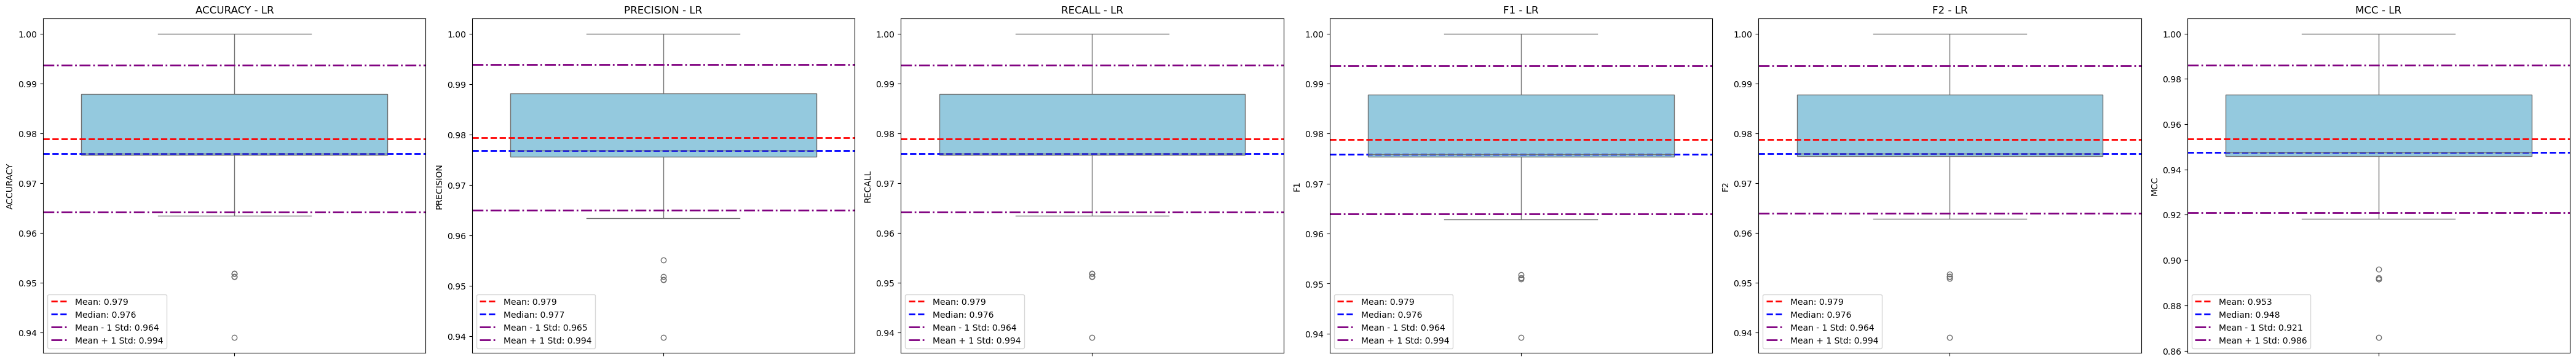

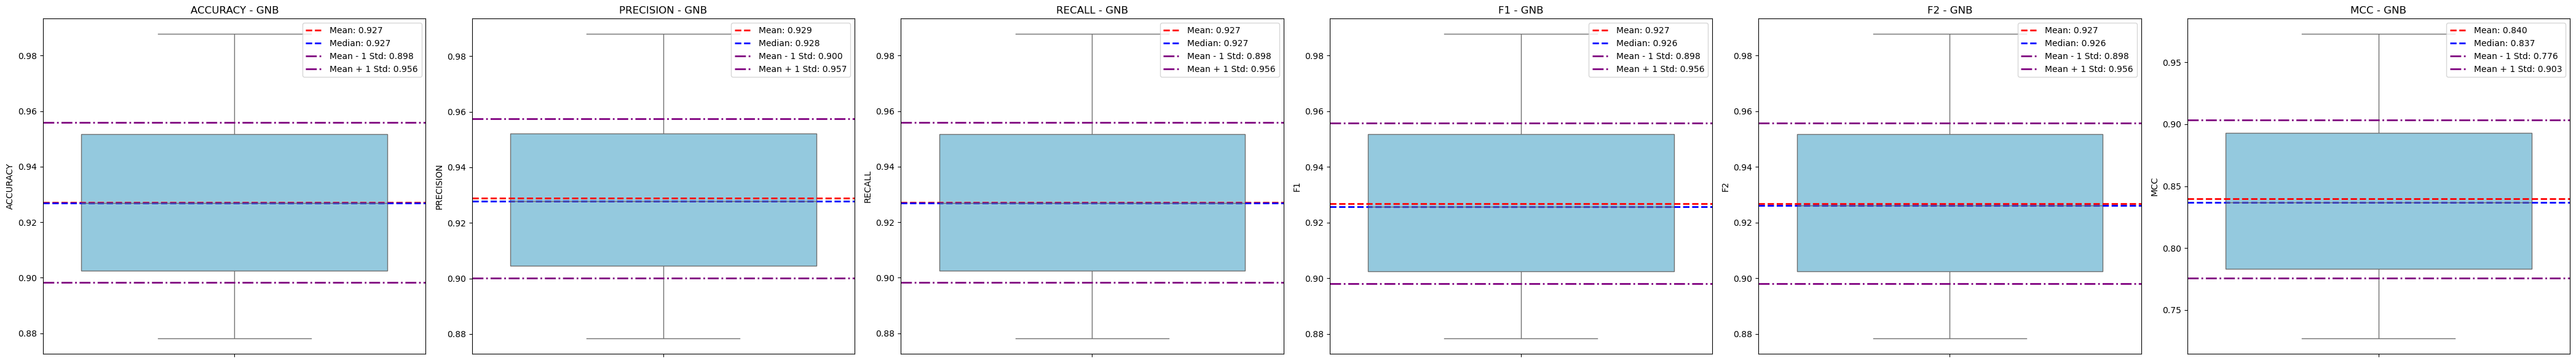

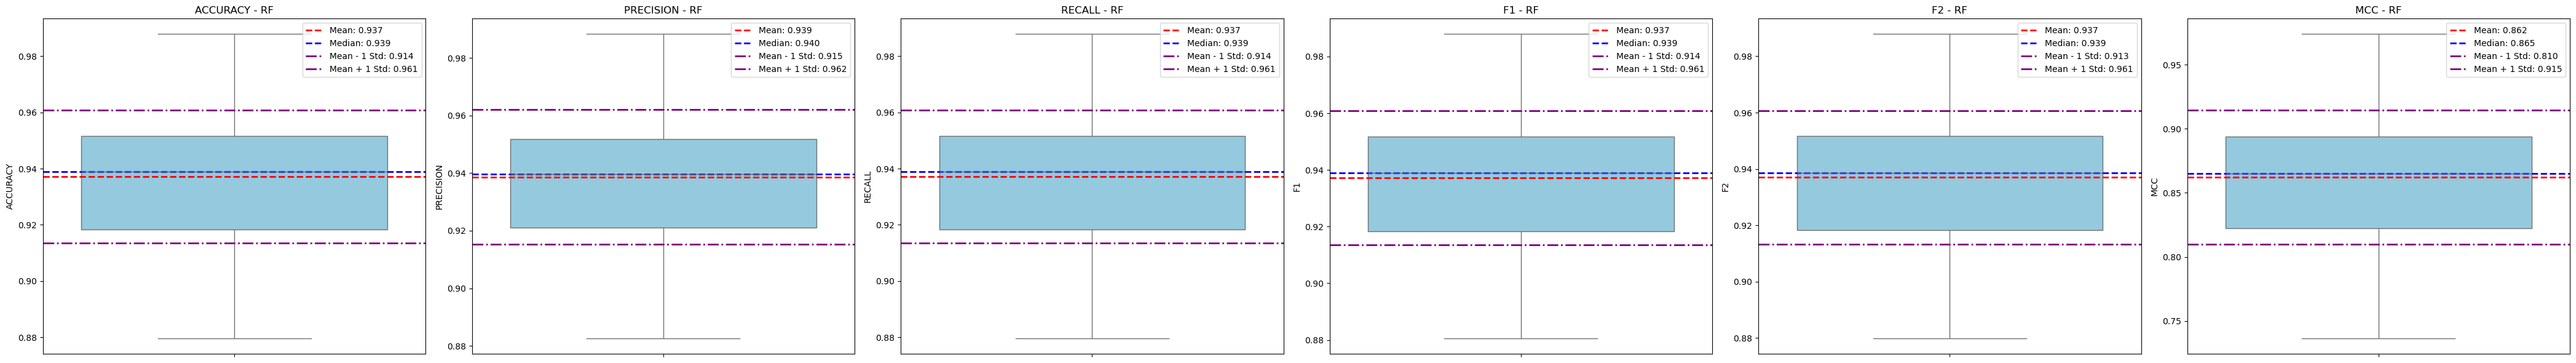

In [4]:
# Define the metrics you want to visualize
metrics = ["accuracy", "precision", "recall", "f1", "f2", "mcc"]

# Create boxplots for each model
for model in ["LGB", "LDA", "LR", "GNB", "RF"]:
    utils.create_boxplot(
        df=results,
        model_name=model,
        metrics=metrics
    )


In [5]:
results.to_csv(root/'data'/'results.csv', index=False)